# Desafío - Gráficos

### 1. Genere una submuestra de casos
- Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria.
- Seleccione el 50% de los casos.
- Cada base generada debe contener los siguientes elementos:
  - *El índice de desarrollo humano ( undp_hdi )*
  - *El nombre del país ( ccodealp )*
  - *La región a la que pertenece ( ht_region )*
  - *El PIB per capita. ( gle_cgdpc )*
  - *El total de la población ( imf_pop )*


- Si su apellido está entre la A y la M, escoja las siguientes variables del módulo Educación:
  - *ffp_hf : Human Flight and Brain Drain*
  - *wef_qes : Quality of the educational system*
  - *wdi_expedu : Government expenditure on education, total (% of GDP)*
  - *wdi_ners : School enrollment, secondary (% net)*
  
- Guarde esta tabla procesada en un nuevo objeto
- Renombre las categorías de la variable ht_region de números a regiones

In [297]:
import pandas as pd
df = pd.read_csv('qog_std_cs_jan18.csv')

In [298]:
# 50% de los casos con semilla pseudoaleatoria solicitada
df50 = df.sample(frac=0.5, random_state=3096)

In [299]:
# seleccionar sólo las que me corresponden por Apellido
dfVM = df50[['undp_hdi', 'ccodealp', 'ht_region','gle_cgdpc', 'imf_pop',
             'ffp_hf', 'wef_qes', 'wdi_expedu', 'wdi_ners']]
dfVM.head()

undp_hdi ccodealp  ht_region   gle_cgdpc     imf_pop  ffp_hf   wef_qes  \
85      0.902      JPN          6  36123.7700  127.120003     2.6  4.430102   
191     0.702      WSM          9   3167.7500    0.192000     8.9       NaN   
147     0.720      VCT         10   7454.8799    0.110000     NaN       NaN   
74      0.834      HUN          1  18310.8110    9.877000     3.3  3.289020   
120     0.555      NPL          8   1462.0800   28.174999     7.0  3.591811   

     wdi_expedu   wdi_ners  
85      3.59184  99.042671  
191         NaN  79.545982  
147         NaN        NaN  
74      4.65935  92.195374  
120     3.98130  59.679131

In [300]:
# renombrar las categorías de ht_region por nombres

dfVM['ht_region'] = dfVM['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          ['EastEurope', 'LatAm', 'NorthAfrica','SubSaharian', 'WesternDem',
                           'EastAsia','SouthEastAsia','SouthAsia','Pacific', 'Caribbean'])

C:\Users\Latam-VyV\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [301]:
dfVM.head()

undp_hdi ccodealp   ht_region   gle_cgdpc     imf_pop  ffp_hf   wef_qes  \
85      0.902      JPN    EastAsia  36123.7700  127.120003     2.6  4.430102   
191     0.702      WSM     Pacific   3167.7500    0.192000     8.9       NaN   
147     0.720      VCT   Caribbean   7454.8799    0.110000     NaN       NaN   
74      0.834      HUN  EastEurope  18310.8110    9.877000     3.3  3.289020   
120     0.555      NPL   SouthAsia   1462.0800   28.174999     7.0  3.591811   

     wdi_expedu   wdi_ners  
85      3.59184  99.042671  
191         NaN  79.545982  
147         NaN        NaN  
74      4.65935  92.195374  
120     3.98130  59.679131

### 2. Genere una función que ingrese su objeto y devuelva:
- Por cada variable existente en su objeto, calcule las medidas descriptivas para los casos contínuos
- Para cada variable discreta, que calcule la frecuencia.
- Reporte las estadísticas descriptivas para gle_cgdpc , undp_hdi , imf_pop .
- Compare las estadísticas con algún compañero. ¿Ve alguna diferencia substancial en alguna de ellas?

In [302]:
var_continuas = ['undp_hdi', 'gle_cgdpc', 'imf_pop', 'ffp_hf', 'wef_qes', 'wdi_expedu', 'wdi_ners']
var_discretas = ['ccodealp', 'ht_region',]

In [303]:
dfVM.describe()

undp_hdi      gle_cgdpc     imf_pop     ffp_hf    wef_qes  wdi_expedu  \
count  93.000000      95.000000   69.000000  88.000000  72.000000   72.000000   
mean    0.689355   14107.573066   24.285594   5.580682   3.618357    4.408599   
std     0.160095   18531.820581   34.848132   1.952767   0.952838    1.587821   
min     0.347000     488.269990    0.018000   1.000000   1.874972    1.021950   
25%     0.558000    2418.025000    2.882000   4.275000   2.908283    3.030473   
50%     0.723000    7454.879900    9.645000   5.900000   3.452582    4.590735   
75%     0.794000   17460.560500   29.825001   7.000000   4.272004    5.435562   
max     0.938000  108481.130000  186.190002   9.200000   5.986858    7.775000   

        wdi_ners  
count  62.000000  
mean   70.744390  
std    24.023778  
min    13.600750  
25%    56.704904  
50%    78.353603  
75%    88.264847  
max    99.444328

In [304]:
for i in var_discretas:
    print(dfVM[i].describe())
    print()

count      97
unique     97
top       MOZ
freq        1
Name: ccodealp, dtype: object

count              97
unique             10
top       SubSaharian
freq               25
Name: ht_region, dtype: object



#### *Al comparar con mis compañeros....*

### 3. Genere una función que liste las observaciones perdidas de una variable
- La función debe contener los siguientes argumentos:
  - dataframe : La función debe ingresar un objeto DataFrame.
  - var : Variable a inspeccionar.
  - print_list : Opción para imprimir la lista de observaciones perdidas en la variable.
  - Debe ser False por defecto.

- La función debe retornar la cantidad de casos perdidos y el porcentaje correspondiente.
- Cuando print_list = True , debe retornar la lista de casos.
- Analice todas las variables y sus casos perdidos.
- Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de países con ausencia de datos.

In [305]:
def obs_perdidas(df, var, print_list=False):
    perdidas = df[var].isnull()  # obs_perdidas
    n_casos = perdidas.sum()  # casos perdidos
    porcen = n_casos/len(perdidas)   # % perdidos
    
    if print_list == True:
        print(df[df[var].isnull() == True]['ccodealp'])
        
    return n_casos, porcen

In [306]:
for i in (list(dfVM)):
    n_casos, porcen = obs_perdidas(dfVM, i, False)
    print("La variable '", i, "' tiene", n_casos, "observaciones perdidas (", round(porcen*100,2),"%).")

La variable ' undp_hdi ' tiene 4 observaciones perdidas ( 4.12 %).
La variable ' ccodealp ' tiene 0 observaciones perdidas ( 0.0 %).
La variable ' ht_region ' tiene 0 observaciones perdidas ( 0.0 %).
La variable ' gle_cgdpc ' tiene 2 observaciones perdidas ( 2.06 %).
La variable ' imf_pop ' tiene 28 observaciones perdidas ( 28.87 %).
La variable ' ffp_hf ' tiene 9 observaciones perdidas ( 9.28 %).
La variable ' wef_qes ' tiene 25 observaciones perdidas ( 25.77 %).
La variable ' wdi_expedu ' tiene 25 observaciones perdidas ( 25.77 %).
La variable ' wdi_ners ' tiene 35 observaciones perdidas ( 36.08 %).


In [307]:
#Mostrar detalle de los 3 casos con más observaciones perdidas:
n_casos, porcen = obs_perdidas(dfVM,'wdi_ners', True)
print("La variable 'wdi_ners' tiene", n_casos, "observaciones perdidas (", round(porcen*100,2),"%).\n")

147    VCT
178    TKM
160    ZAF
154    SLE
97     LBR
105    MDV
28     KHM
176    TUN
46     CZE
18     BIH
36     CHN
30     CAN
112    MNG
172    TGO
111    MCO
193    ZMB
83     CIV
61     GAB
156    SVK
151    SEN
60     DJI
66     KIR
114    MNE
98     LBY
164    SDN
4      AGO
174    TTO
148    SMR
2      DZA
64     DEU
139    GNB
13     ARM
159    SOM
163    SSD
6      AZE
Name: ccodealp, dtype: object
La variable 'wdi_ners' tiene 35 observaciones perdidas ( 36.08 %).



In [308]:
n_casos, porcen = obs_perdidas(dfVM,'imf_pop', True)
print("La variable 'imf_pop' tiene", n_casos, "observaciones perdidas (", round(porcen*100,2),"%).\n")

149    STP
178    TKM
97     LBR
99     LIE
44     CUB
176    TUN
145    KNA
69     GTM
36     CHN
1      ALB
169    SYR
111    MCO
193    ZMB
190    VEN
125    NER
61     GAB
151    SEN
60     DJI
164    SDN
73     HND
32     CAF
42     CRI
26     BDI
139    GNB
89     PRK
159    SOM
102    MDG
163    SSD
Name: ccodealp, dtype: object
La variable 'imf_pop' tiene 28 observaciones perdidas ( 28.87 %).



In [309]:
n_casos, porcen = obs_perdidas(dfVM,'wef_qes', True)
print("La variable 'wef_qes' tiene", n_casos, "observaciones perdidas (", round(porcen*100,2),"%).\n\n")

n_casos, porcen = obs_perdidas(dfVM,'wdi_expedu', True)
print("La variable 'wdi_expedu' tiene", n_casos, "observaciones perdidas (", round(porcen*100,2),"%).\n")

191    WSM
147    VCT
149    STP
178    TKM
105    MDV
99     LIE
44     CUB
130    PLW
145    KNA
172    TGO
111    MCO
125    NER
146    LCA
60     DJI
66     KIR
164    SDN
189    UZB
0      AFG
148    SMR
57     FJI
32     CAF
139    GNB
89     PRK
159    SOM
163    SSD
Name: ccodealp, dtype: object
La variable 'wef_qes' tiene 25 observaciones perdidas ( 25.77 %).


191    WSM
147    VCT
44     CUB
130    PLW
18     BIH
36     CHN
169    SYR
193    ZMB
190    VEN
115    MAR
183    EGY
60     DJI
66     KIR
114    MNE
165    SUR
98     LBY
164    SDN
4      AGO
189    UZB
174    TTO
2      DZA
136    PHL
67     GRC
89     PRK
159    SOM
Name: ccodealp, dtype: object
La variable 'wdi_expedu' tiene 25 observaciones perdidas ( 25.77 %).



### 4. Grafique los histogramas
- Genere una función que grafique un histograma en conjunto y señale las medias.
- La función debe incluír los siguientes argumentos:
  - dataframe : La base de datos donde se encuentran los datos específicos.
  - var : La variable a graficar.
  - sample_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral. Por defecto debe ser False .
  - true_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa.

Implemente las funciones para las 4 variables seleccionadas según su grupo.
¿En qué variables la media de la submuestra es mayor a la de la muestra completa?

In [310]:
import matplotlib.pyplot as plt
import numpy as np

def histograma(dataframe, variable, sample_mean = False, true_mean = False):
    dataframe_var_dropna = dataframe[variable].dropna()
    s_mean = dataframe_var_dropna.mean()
    df_mean = df[variable].dropna().mean()  # se asume acceso a variable global 'df' con la DB completa

    plt.hist(dataframe_var_dropna, color = "lightgrey")
    plt.xlabel(variable)
    plt.ylabel("Frecuencia")

    if sample_mean:
        print("La media de la submuestra es:", round(s_mean,2))
        plt.axvline(s_mean, lw=3, color="tomato", linestyle="--")
    
    if true_mean:  
        print("La media de la DB completa es:", round(df_mean,2))
        plt.axvline(df_mean, lw=3, color="dodgerblue", linestyle="--")
    
    if s_mean > df_mean:
        print("\tLa media de la submuestra es mayor.")

La media de la submuestra es: 5.58
La media de la DB completa es: 5.54
	La media de la submuestra es mayor.


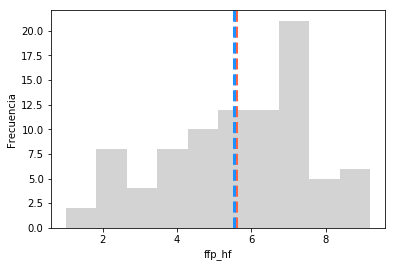

In [311]:
histograma(dfVM, 'ffp_hf', True, True)

La media de la submuestra es: 3.62
La media de la DB completa es: 3.69


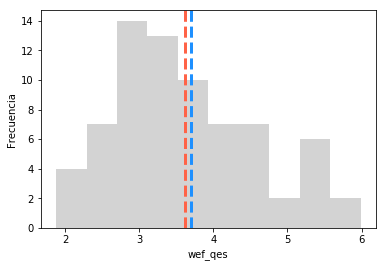

In [312]:
histograma(dfVM, 'wef_qes', True, True)

La media de la submuestra es: 4.41
La media de la DB completa es: 4.58


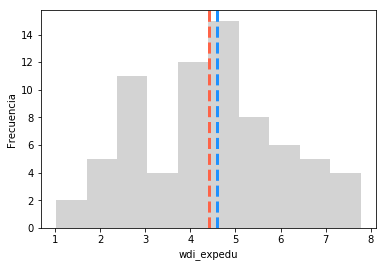

In [313]:
histograma(dfVM, 'wdi_expedu', True, True)

La media de la submuestra es: 70.74
La media de la DB completa es: 72.72


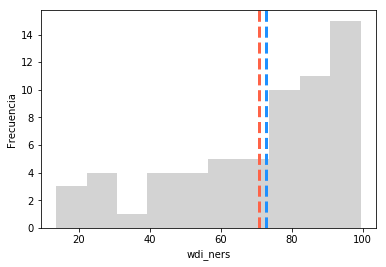

In [314]:
histograma(dfVM, 'wdi_ners', True, True)

#### ****Sólo en el caso de la variable 'ffp_hf', la media de la submuestra es mayor a la media de la DB completa.*

### 5. Genere una función que devuelva un dotplot
La función debe contener los siguientes argumentos como argumentos:
- dataframe : La tabla de datos donde buscar las variables.
- plot_var : La variable a analizar y extraer las medias.
- plot_by : La variable agrupadora.
- global_stat : Booleano. Si es True debe graficar la media global de la variable. Por defecto debe ser False .
- statistic: Debe presentar dos opciones. mean para la media y median para la mediana. Por defecto debe ser mean .

Implemente la función en las 3 variables con una menor cantidad de datos perdidos.

In [315]:
def dotplot(dataframe, plot_var, plot_by, global_stat = False, statistic = 'mean'):
    df_mean = df[plot_var].dropna().mean()  # se asume acceso a variable global 'df' con la DB completa
    dataframe_groupby_means = dataframe.groupby(plot_by)[plot_var].mean()
    dataframe_groupby_medians = dataframe.groupby(plot_by)[plot_var].median()

    plt.xlabel(plot_var)
    plt.ylabel(plot_by)
        
    if global_stat:  
        print("La media de la DB completa es:", round(df_mean,2))
        plt.axvline(df_mean, lw=3, color="dodgerblue", linestyle="--")
        
    if statistic == 'mean':
        print("La media de la submuestra es:", round(dataframe[plot_var].dropna().mean(),2))
        plt.plot(dataframe_groupby_means.values, dataframe_groupby_means.index, 'rs')
        plt.axvline(dataframe[plot_var].mean(), color= 'tomato', linestyle = '--')
    elif statistic == 'median':
        print("La mediana de la submuestra es:", round(dataframe[plot_var].dropna().median(),2))
        plt.plot(dataframe_groupby_medians.values, dataframe_groupby_medians.index, 'gd')
        plt.axvline(dataframe[plot_var].median(), color= 'darkgreen', linestyle = '--')
            

La media de la DB completa es: 14279.04
La media de la submuestra es: 14107.57


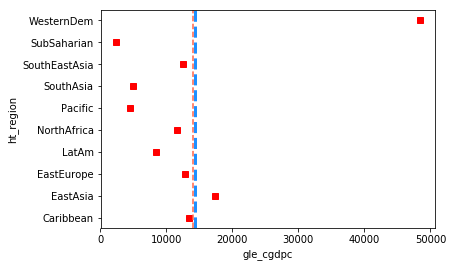

In [316]:
# 3 variables con menor cantidad de casos perdidos: 'gle_cgdpc', 'undp_hdi' y 'ffp_hf' 

dotplot(dfVM, 'gle_cgdpc', 'ht_region', True, 'mean')

La media de la DB completa es: 14279.04
La mediana de la submuestra es: 7454.88


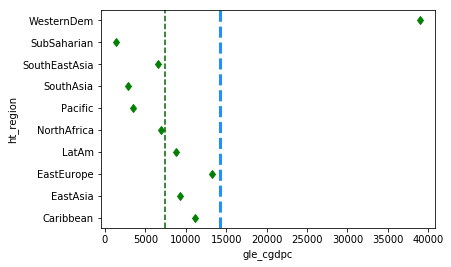

In [317]:
dotplot(dfVM, 'gle_cgdpc', 'ht_region', True, 'median')

La media de la DB completa es: 0.7
La media de la submuestra es: 0.69


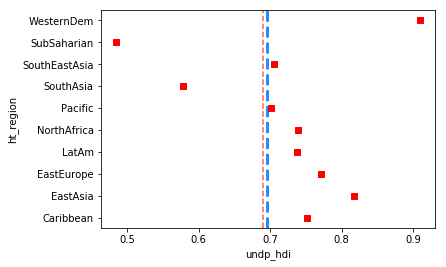

In [318]:
dotplot(dfVM, 'undp_hdi', 'ht_region', True, 'mean')

La media de la DB completa es: 0.7
La mediana de la submuestra es: 0.72


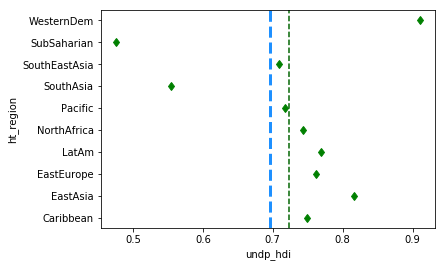

In [319]:
dotplot(dfVM, 'undp_hdi', 'ht_region', True, 'median')

La media de la DB completa es: 5.54
La media de la submuestra es: 5.58


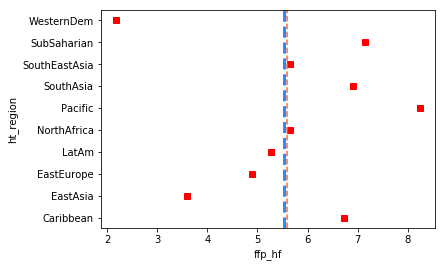

In [320]:
dotplot(dfVM, 'ffp_hf', 'ht_region', True, 'mean')

La media de la DB completa es: 5.54
La mediana de la submuestra es: 5.9


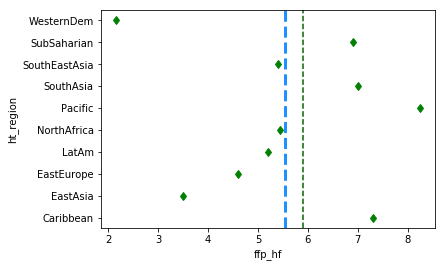

In [321]:
dotplot(dfVM, 'ffp_hf', 'ht_region', True, 'median')

### 6. Guarde la base de datos
La submuestra creada tiene un método llamado to_csv .
Acceda a éste y guarde la base de datos con la siguiente nomenclatura:
subsample_<iniciales>_demo.csv .
(Súbala a la plataforma, junto al desafío)

In [322]:
dfVM.head()

undp_hdi ccodealp   ht_region   gle_cgdpc     imf_pop  ffp_hf   wef_qes  \
85      0.902      JPN    EastAsia  36123.7700  127.120003     2.6  4.430102   
191     0.702      WSM     Pacific   3167.7500    0.192000     8.9       NaN   
147     0.720      VCT   Caribbean   7454.8799    0.110000     NaN       NaN   
74      0.834      HUN  EastEurope  18310.8110    9.877000     3.3  3.289020   
120     0.555      NPL   SouthAsia   1462.0800   28.174999     7.0  3.591811   

     wdi_expedu   wdi_ners  
85      3.59184  99.042671  
191         NaN  79.545982  
147         NaN        NaN  
74      4.65935  92.195374  
120     3.98130  59.679131

In [323]:
dfVM.to_csv('subsample__demo.csv')